In [3]:
# Libraries
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, losses

print(tf.__version__)

2.3.0


In [4]:
# Import and load the Fashion MNIST data directly from TensorFlow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle']

Explore the data
--
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
# With train images and labels
print(train_images.shape)
print(len(train_labels))
print(train_labels)
#print(train_images) # matrix is not neccessary to show

print('\n')
# With test images
print(test_images.shape)
print(len(test_labels))
#print(test_labels) # actually u won't have this :))))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


(10000, 28, 28)
10000


Preprocess the data
--
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

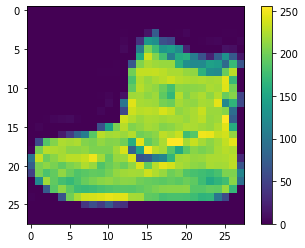

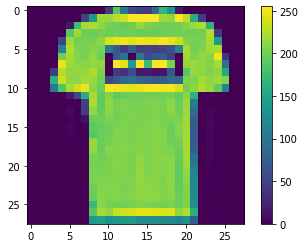

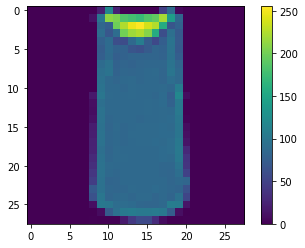

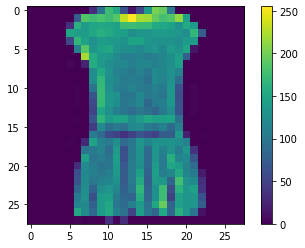

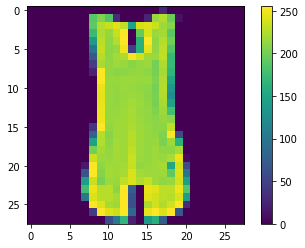

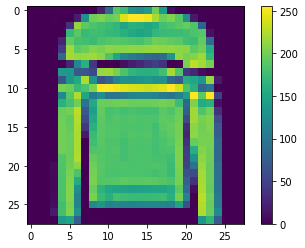

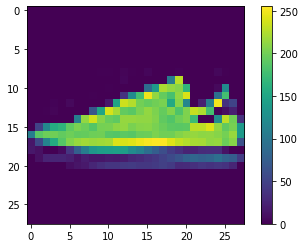

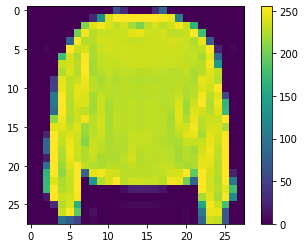

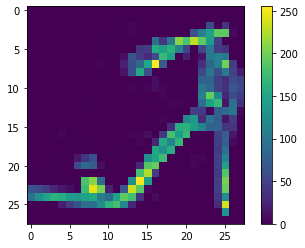

In [7]:
# show first 10 images in train_dataset
for i in range(0, 9):
  plt.figure()
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False) # grid true means ô có lưới
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image

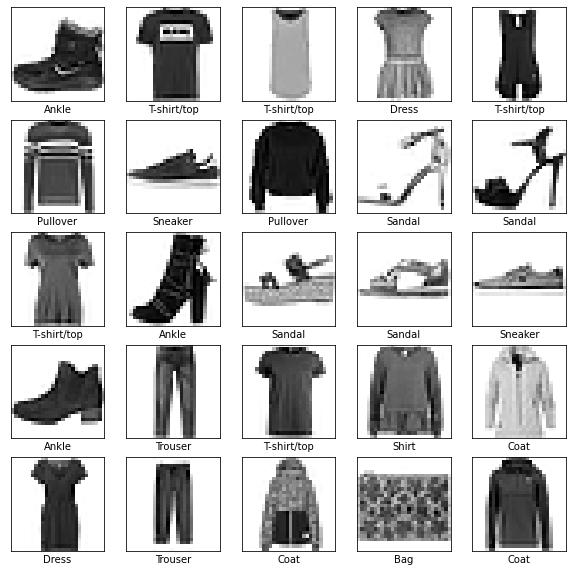

In [9]:
plt.figure(figsize=(10, 10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Build the model
--
Building the neural network requires configuring the layers of the model, then compiling the model

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
--
Most of deep learning consists of chaining together simple layers

In [10]:
# simple model to recognize
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compile the model
--
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

*   Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction
*   Optimizer —This is how the model is updated based on the data it sees and its loss function
*   Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.





In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Train the model
--
Training the neural network model requires the following steps:

1.   Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays
2.   The model learns to associate images and labels.
1.   You ask the model to make predictions about a test set—in this example, the test_images array.
2.   Verify that the predictions match the labels from the test_labels array





Feed the model
--
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [18]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2345 - accuracy: 0.9121
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2266 - accuracy: 0.9155
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2218 - accuracy: 0.9162
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2138 - accuracy: 0.9205
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2089 - accuracy: 0.9215
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2012 - accuracy: 0.9245
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1980 - accuracy: 0.9261
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1936 - accuracy: 0.9279
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1865 - accuracy: 0.9308
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.184

Evaluate accuracy
--
Next, compare how the model performs on the test dataset:

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n Test accuracy:', test_acc)

313/313 - 0s - loss: 0.4339 - accuracy: 0.8876

 Test accuracy: 0.8876000046730042


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

Make predictions
--
With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [21]:
model.add(layers.Softmax()) # probability model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
predictions = model(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [23]:
print(predictions[0])

tf.Tensor(
[0.08533679 0.08533679 0.08533679 0.08533679 0.08533679 0.08533679
 0.08533679 0.08533716 0.08533679 0.23196845], shape=(10,), dtype=float32)


A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value

In [24]:
print(np.argmax(predictions[0]))

# compare with real ones
print(test_labels[0])

9
9


So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct

Graph this to look at the full set of 10 class predictions.

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color)) 

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[true_label].set_color('blue')
  thisplot[predicted_label].set_color('red')

Verify predictions
--
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label

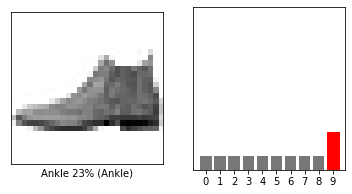

In [30]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

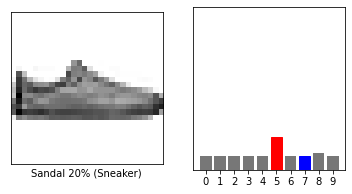

In [31]:
# with 12th object
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident

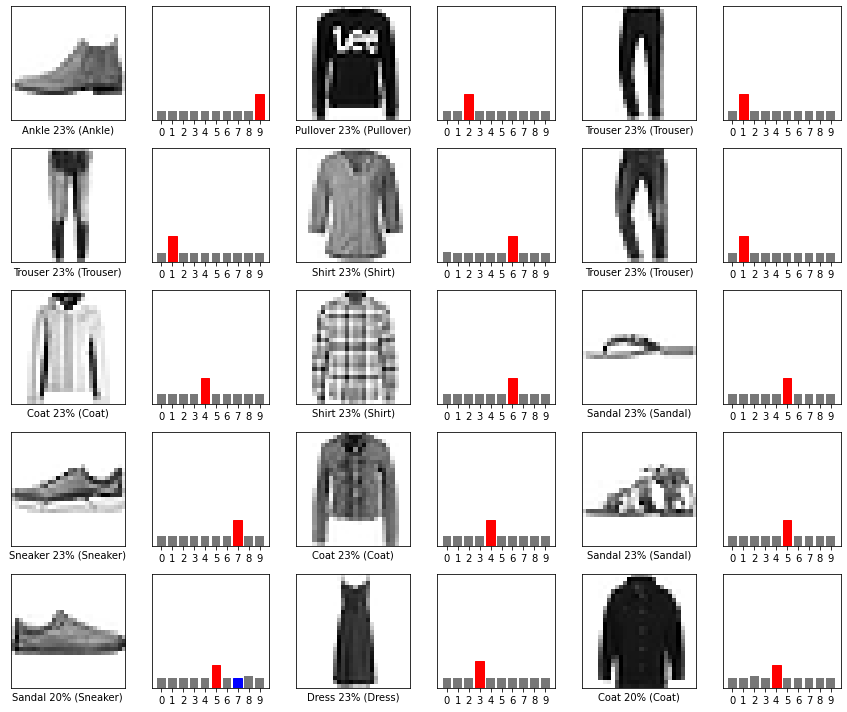

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model
--
Finally, use the trained model to make a prediction about a single image.

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.08533757 0.08533756 0.2319564  0.08533756 0.0853431  0.08533756
  0.08533756 0.08533756 0.08533756 0.08533756]]


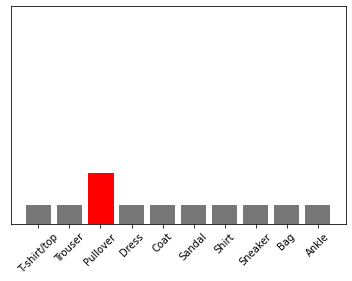

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [38]:
np.argmax(predictions_single[0])

2